Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [ ]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [ ]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [ ]:
# Load images and labels
images = np.load('/content/drive/My Drive/FYP/dataset/images.npy')
labels = np.load('/content/drive/My Drive/FYP/dataset/labels.npy')

## [3.2] Jupyter

In [ ]:
# Load images and labels
images = np.load('dataset/images.npy')
labels = np.load('dataset/labels.npy')

# [4] Prepare Dataset

In [ ]:
images = resize_images(images, (299,299))

In [ ]:
# Display array shapes
display_array_shapes(images, labels)

+--------------+--------------------+
| Array Name   | Shape              |
+==============+====================+
| Images       | (941, 299, 299, 3) |
+--------------+--------------------+
| Labels       | (941,)             |
+--------------+--------------------+


In [ ]:
# Get the number of unique labels
num_classes = len(np.unique(labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [ ]:
# Binarize labels
labels_binarized = binarize_labels(labels)

# [5] Train Model

In [ ]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (752, 299, 299, 3) (752, 9)
Validation shape: (94, 299, 299, 3) (94, 9)
Test shape: (95, 299, 299, 3) (95, 9)


In [ ]:
# Build and compile InceptionV3 model
inceptionv3_model = build_and_compile_inceptionv3_model(num_classes)

2024-04-02 16:50:14.085919: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 16:50:14.085985: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 16:50:14.086437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Train the model
inceptionv3_history = inceptionv3_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(X_val, y_val)

2024-04-02 16:50:23.877038: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 806754624 exceeds 10% of free system memory.


Epoch 1/10
18/18 [==============================] - 41s 2s/step - loss: 14.9877 - accuracy: 0.4122 - val_loss: 10.0816 - val_accuracy: 0.5745
Epoch 2/10
18/18 [==============================] - 24s 1s/step - loss: 2.4562 - accuracy: 0.8059 - val_loss: 6.5602 - val_accuracy: 0.5638
Epoch 3/10
18/18 [==============================] - 30s 2s/step - loss: 0.8583 - accuracy: 0.9136 - val_loss: 5.0896 - val_accuracy: 0.7340
Epoch 4/10
18/18 [==============================] - 23s 1s/step - loss: 0.3114 - accuracy: 0.9548 - val_loss: 6.8539 - val_accuracy: 0.6170
Epoch 5/10
18/18 [==============================] - 22s 1s/step - loss: 0.0878 - accuracy: 0.9827 - val_loss: 4.8368 - val_accuracy: 0.6809
Epoch 6/10
18/18 [==============================] - 19s 1s/step - loss: 0.0245 - accuracy: 0.9934 - val_loss: 4.4076 - val_accuracy: 0.7128
Epoch 7/10
18/18 [==============================] - 18s 1s/step - loss: 0.0167 - accuracy: 0.9973 - val_loss: 4.7775 - val_accuracy: 0.7128
Epoch 8/10
18/18 [

In [ ]:
# Calculate average loss and accuracy
average_loss = sum(inceptionv3_history.history['val_loss']) / len(inceptionv3_history.history['val_loss'])
average_accuracy = sum(inceptionv3_history.history['val_accuracy']) / len(inceptionv3_history.history['val_accuracy'])

print(f"Average Validation Loss: {average_loss}, Average Validation Accuracy: {average_accuracy}")

Average Validation Loss: 5.744345235824585, Average Validation Accuracy: 0.6595744490623474


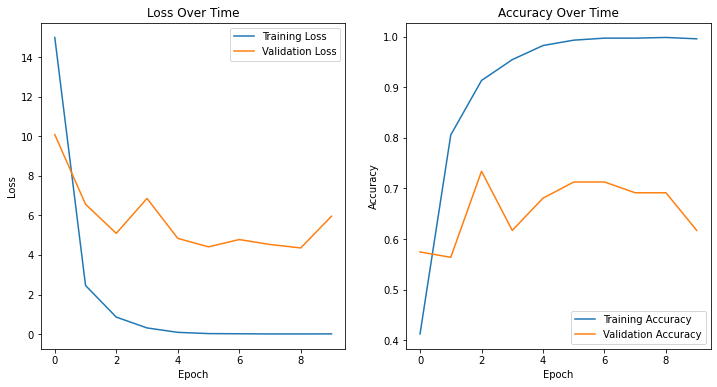

In [ ]:
plot_training_history(inceptionv3_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save model
inceptionv3_model.save('/content/drive/MyDrive/FYP/models/InceptionV3_noAugment')

## [6.2] Jupyter

In [ ]:
# Save model
inceptionv3_model.save('models/InceptionV3_noAugment')

INFO:tensorflow:Assets written to: models/InceptionV3_noAugment/assets


INFO:tensorflow:Assets written to: models/InceptionV3_noAugment/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/InceptionV3_noAugment')

## [6.2] Jupyter

In [ ]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('models/InceptionV3_noAugment')

# [7] Test and Analyse

In [ ]:
# Evaluate the model on the test data
inceptionv3_test_loss, inceptionv3_test_accuracy = loaded_inceptionv3_model.evaluate(X_test, y_test)
print(f"Test Loss: {inceptionv3_test_loss}, Test Accuracy: {inceptionv3_test_accuracy}")

3/3 [==============================] - 6s 802ms/step - loss: 5.4453 - accuracy: 0.6842
Test Loss: 5.445289134979248, Test Accuracy: 0.6842105388641357


In [ ]:
inceptionv3_predicted_labels, inceptionv3_true_labels_list = make_predictions_and_evaluate(loaded_inceptionv3_model, X_test, y_test)

3/3 [==============================] - 4s 665ms/step


In [ ]:
calculate_classification_metrics(inceptionv3_true_labels_list, inceptionv3_predicted_labels)

Accuracy: 0.6842
Precision: 0.8194
Recall: 0.5801
F1 Score: 0.6793


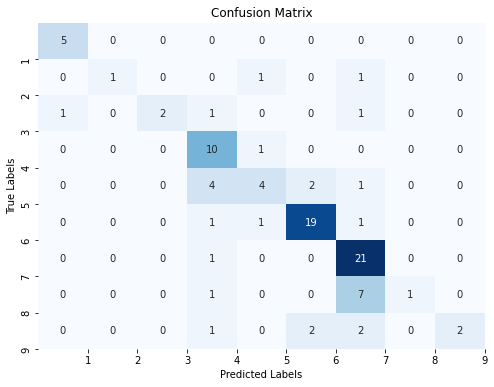

In [ ]:
display_confusion_matrix(inceptionv3_true_labels_list, inceptionv3_predicted_labels)